In [40]:
import numpy as np # NumPy is the fundamental package for scientific computing

import pandas as pd # Pandas is an easy-to-use data structures and data analysis tools
pd.set_option('display.max_columns', None) # To display all columns

import matplotlib.pyplot as plt # Matplotlib is a python 2D plotting library
%matplotlib inline 
# A magic command that tells matplotlib to render figures as static images in the Notebook.

import seaborn as sns # Seaborn is a visualization library based on matplotlib (attractive statistical graphics).
sns.set_style('whitegrid') # One of the five seaborn themes
import warnings
warnings.filterwarnings('ignore') # To ignore some of seaborn warning msg

from scipy import stats

from sklearn import linear_model # Scikit learn library that implements generalized linear models
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors

from math import log

In [41]:
data = pd.read_csv("kc_house_data.csv", parse_dates = ['date']) 
data.head(5) 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21596 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
renovated        21597 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.3+ MB


In [75]:
data.mean()

price            540296.573506
bedrooms              3.373200
bathrooms             2.115826
sqft_living        2080.321850
sqft_lot          15099.408760
floors                1.494096
waterfront            0.007316
view                  0.234384
condition             3.409825
grade                 7.657915
sqft_above         1788.596842
yr_built           1970.999676
yr_renovated         83.822336
zipcode           98077.951845
lat                  47.560093
long               -122.213982
sqft_living15      1986.620318
sqft_lot15        12758.283512
renovated             0.034449
dtype: float64

In [42]:
data.drop(['id', 'date'], axis = 1, inplace = True)

In [43]:
# 1 if the house has been renovated

data['yr_renovated'] = pd.to_numeric(data['yr_renovated'])
data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0) 
data['renovated']

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: renovated, Length: 21597, dtype: int64

In [44]:
from decimal import Decimal
int(Decimal('0.00')
    
#data['sqft_basement'] = pd.to_numeric(data['sqft_basement'])
    
#data['sqft_basement'] = data['sqft_basement'].astype(int)


#data['basement_present'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0) 

SyntaxError: unexpected EOF while parsing (<ipython-input-44-cf1f9294a2aa>, line 9)

In [45]:
data.isnull().any()


price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
renovated        False
dtype: bool

In [46]:
data = data.fillna(method='ffill')

In [77]:
X = data[['bedrooms', 'grade', 'sqft_living', 'floors']]
y = data['price']

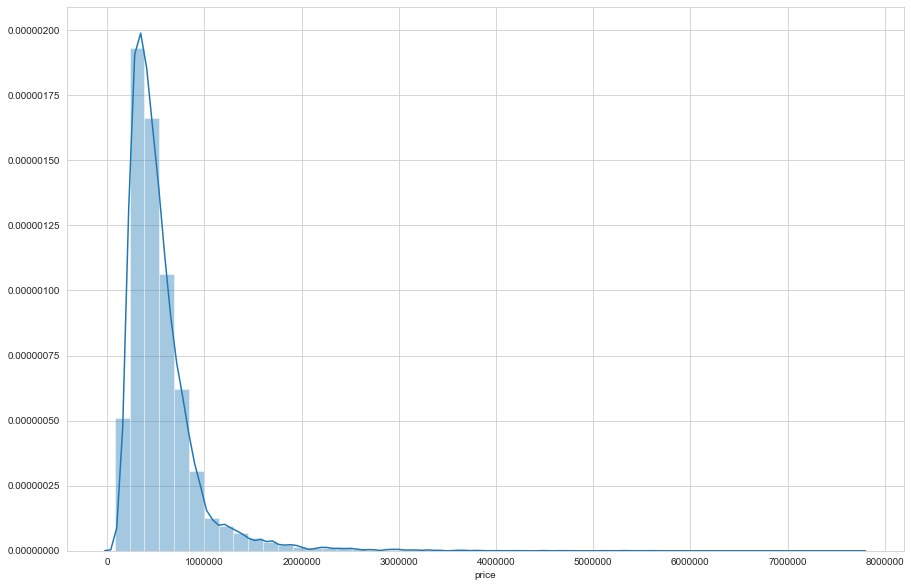

In [78]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['price'])

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [80]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:

coeff_df = pd.DataFrame(regressor.coef_, X.columns,columns=['Coefficient'])  
coeff_df

,Coefficient
bedrooms,-42426.287298
grade,100842.514903
sqft_living,221.595440
floors,-46368.448518


In [82]:
y_pred = regressor.predict(X_test)


In [83]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
156,650000.0,1.000594e+06
15572,625000.0,5.697304e+05
2080,822500.0,9.935006e+05
17522,179900.0,2.243315e+05
8360,370000.0,9.098960e+05
12832,737000.0,7.175977e+05
17280,515500.0,6.917745e+05
7583,390000.0,2.688172e+05
19963,447055.0,7.079675e+05
1754,850000.0,9.839905e+05


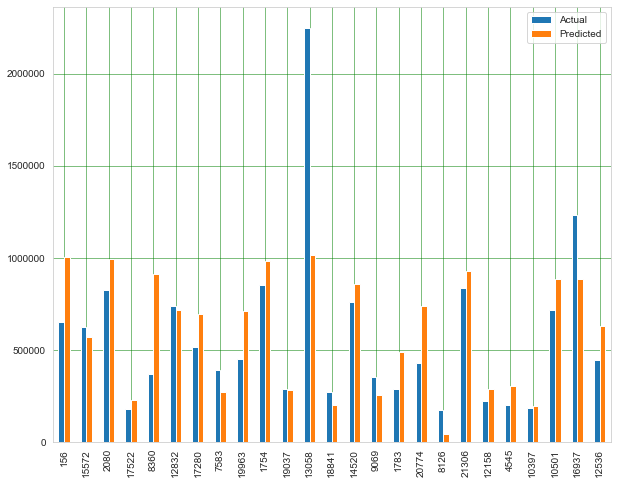

In [84]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [85]:


from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 160455.18443584535
Mean Squared Error: 55185306680.734436
Root Mean Squared Error: 234915.53094832713
